<a href="https://colab.research.google.com/github/byannurcahyo/2241720134-PCVK-2024/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

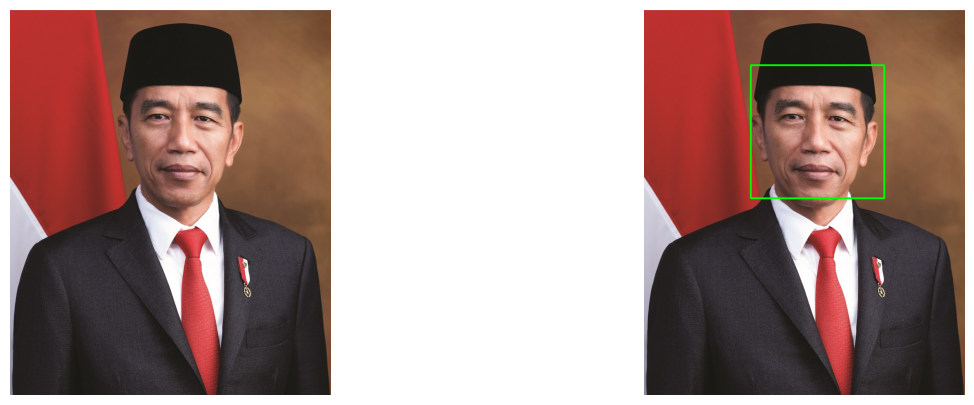

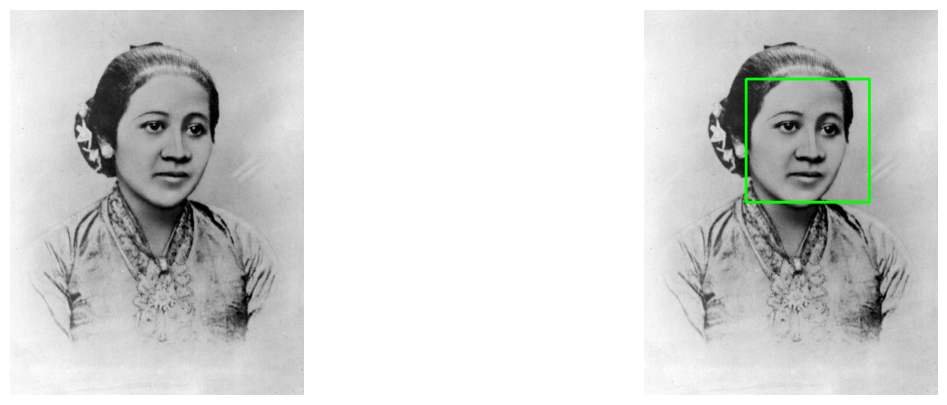

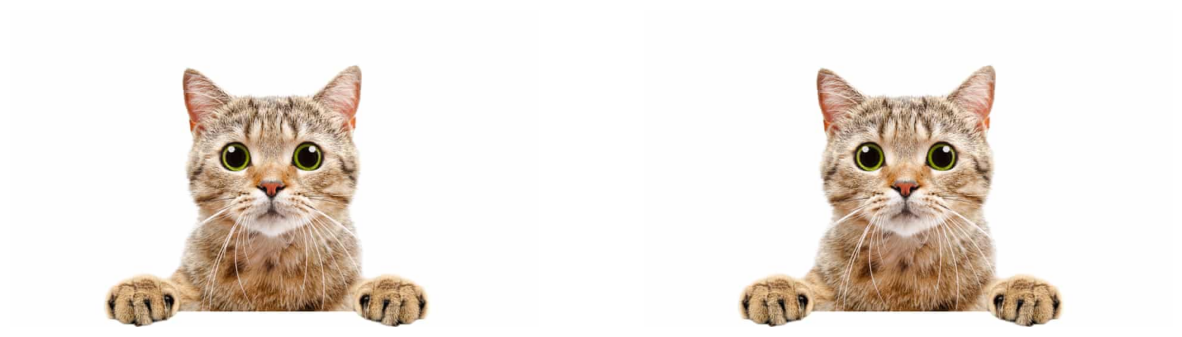

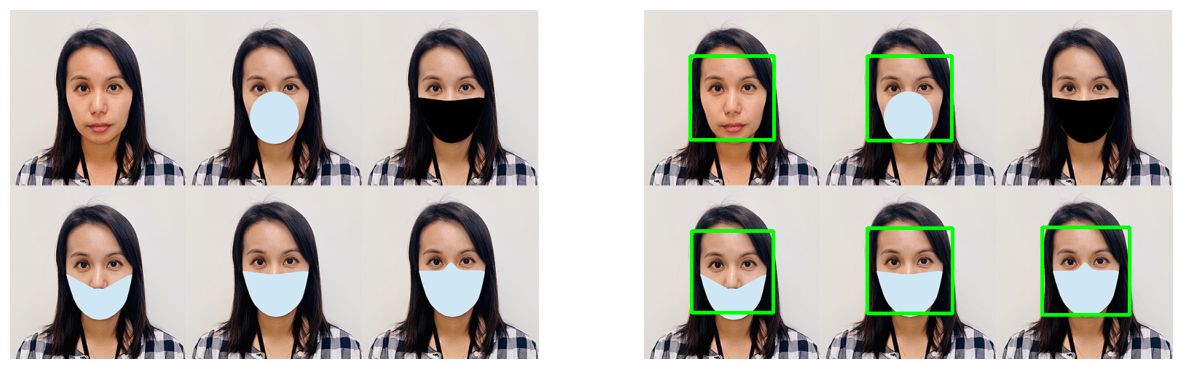

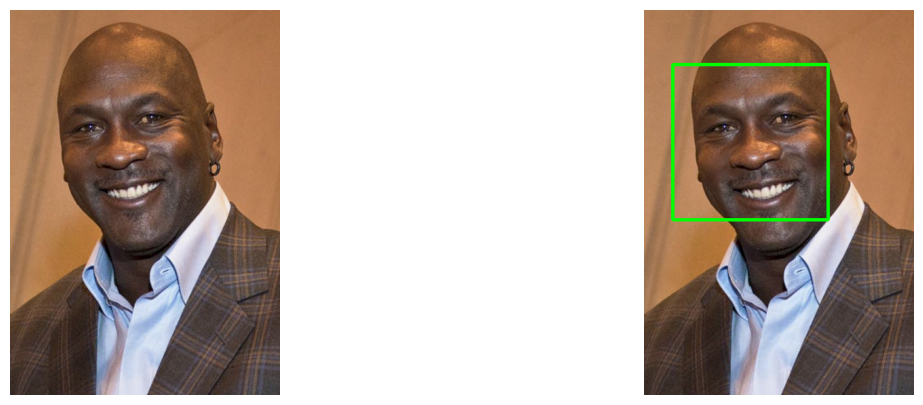

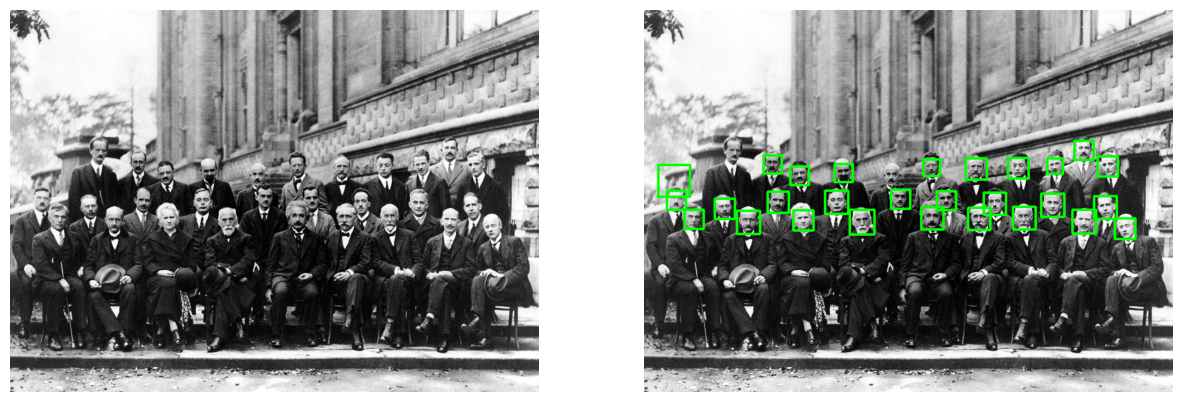

In [ ]:
cascade_path = '/content/drive/MyDrive/PCVK/haarcascades/haarcascade_frontalface_alt.xml'

def display_face_detection(image_path, cascade_path):
    # Load haarcascade classifier
    cascade = cv.CascadeClassifier(cascade_path)

    # Load image
    original_img = cv.imread(image_path)
    display_img = original_img.copy()

    # Face detection
    faces = cascade.detectMultiScale(display_img)

    # Create rectangle
    for (x, y, w, h) in faces:
        cv.rectangle(display_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

    # Print image
    f, axarr = plt.subplots(1, 2, figsize=(15, 5))
    axarr[0].imshow(cv.cvtColor(original_img, cv.COLOR_BGR2RGB))
    axarr[1].imshow(cv.cvtColor(display_img, cv.COLOR_BGR2RGB))

    for ax in axarr:
        ax.axis('off')
    plt.show()

display_face_detection('/content/drive/MyDrive/PCVK/facedet/jokowi.jpg', cascade_path)
display_face_detection('/content/drive/MyDrive/PCVK/facedet/kartini.jpg', cascade_path)
display_face_detection('/content/drive/MyDrive/PCVK/facedet/kucing.jpg', cascade_path)
display_face_detection('/content/drive/MyDrive/PCVK/facedet/mask.png', cascade_path)
display_face_detection('/content/drive/MyDrive/PCVK/facedet/mjordan.jpg', cascade_path)
display_face_detection('/content/drive/MyDrive/PCVK/facedet/solvayconf.jpg', cascade_path)

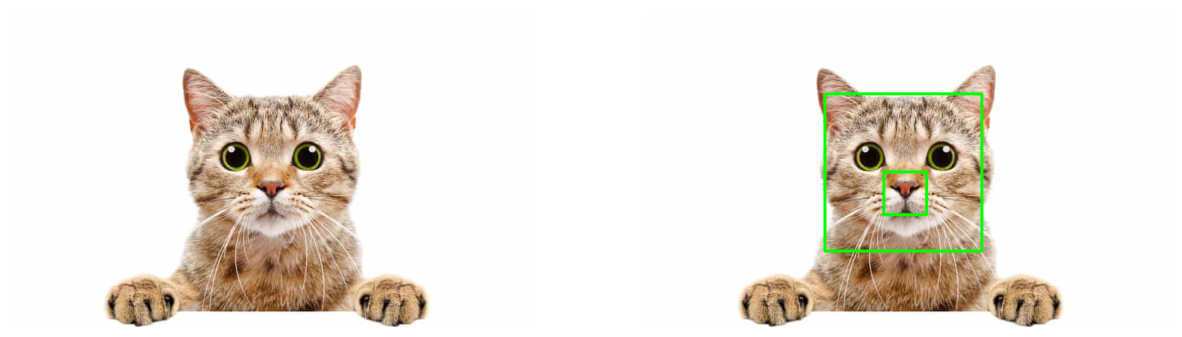

In [ ]:
cascade_path = '/content/drive/MyDrive/PCVK/haarcascades/haarcascade_frontalcatface_extended.xml'

def display_face_detection(image_path, cascade_path):
    # Load haarcascade classifier
    cascade = cv.CascadeClassifier(cascade_path)

    # Load image
    original_img = cv.imread(image_path)
    display_img = original_img.copy()

    # Face detection
    faces = cascade.detectMultiScale(display_img)

    # Create rectangle
    for (x, y, w, h) in faces:
        cv.rectangle(display_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

    # Print image
    f, axarr = plt.subplots(1, 2, figsize=(15, 5))
    axarr[0].imshow(cv.cvtColor(original_img, cv.COLOR_BGR2RGB))
    axarr[1].imshow(cv.cvtColor(display_img, cv.COLOR_BGR2RGB))

    for ax in axarr:
        ax.axis('off')
    plt.show()

display_face_detection('/content/drive/MyDrive/PCVK/facedet/kucing.jpg', cascade_path)


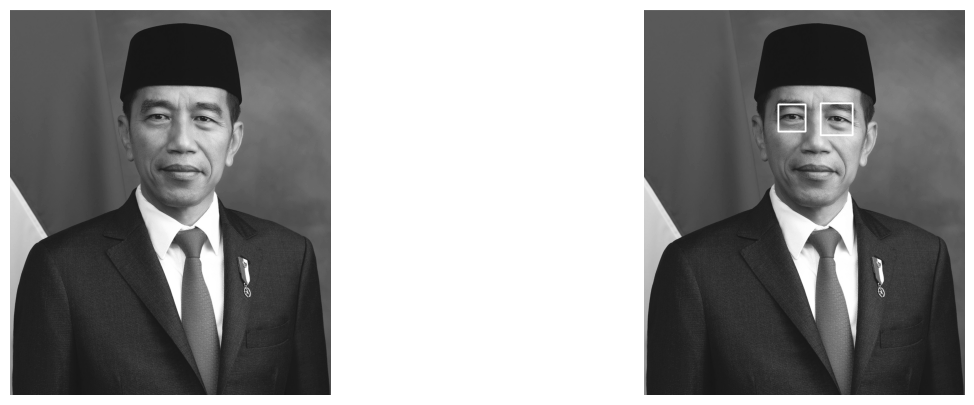

In [ ]:
cascade_path = '/content/drive/MyDrive/PCVK/haarcascades/haarcascade_eye.xml'

def display_eye_detection(image_path, cascade_path):
    # Load haarcascade classifier
    cascade = cv.CascadeClassifier(cascade_path)

    # Load image
    original_img = cv.imread(image_path)
    display_img = original_img.copy()

    # Convert grayscale
    original_img_gray = cv.cvtColor(original_img, cv.COLOR_BGR2GRAY)
    display_img_gray = cv.cvtColor(display_img, cv.COLOR_BGR2GRAY)

    # Face detection
    faces = cascade.detectMultiScale(display_img_gray)

    # Create rectangle
    for (x, y, w, h) in faces:
        cv.rectangle(display_img_gray, (x, y), (x + w, y + h), (255, 255, 0), 3)

    # Print image
    f, axarr = plt.subplots(1, 2, figsize=(15, 5))
    axarr[0].imshow(original_img_gray, cmap='gray')
    axarr[1].imshow(display_img_gray, cmap='gray')

    for ax in axarr:
        ax.axis('off')
    plt.show()

display_eye_detection('/content/drive/MyDrive/PCVK/facedet/jokowi.jpg', cascade_path)

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


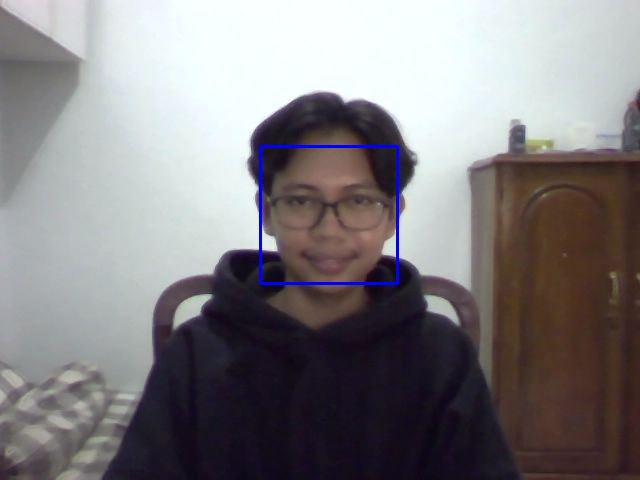

In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

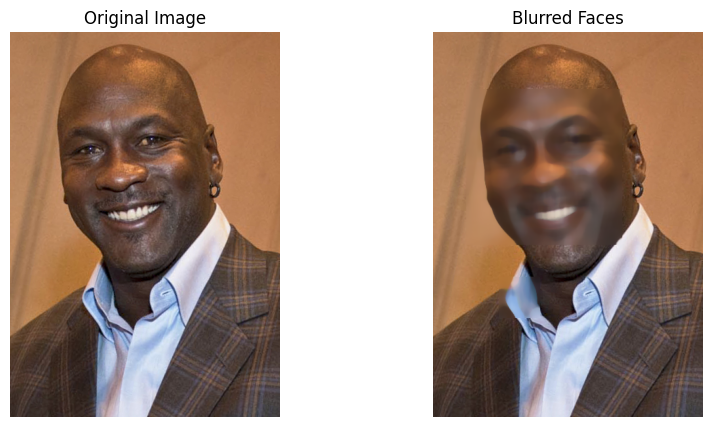

In [ ]:
# Path gambar input
image_path = '/content/drive/MyDrive/PCVK/facedet/mjordan.jpg'

# Fungsi untuk mendeteksi wajah menggunakan OpenCV Haarcascades
def detect_faces(image_path):
    # Baca gambar
    image = cv2.imread(image_path)
    # Konversi gambar ke grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Inisialisasi Haar Cascade untuk deteksi wajah
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Deteksi wajah pada gambar
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

    return faces, image

# Fungsi untuk melakukan blurring pada bagian wajah
def blur_faces(image, faces):
    for (x, y, w, h) in faces:
        # Ambil ROI (Region of Interest) pada wajah
        face_roi = image[y:y+h, x:x+w]

        # Lakukan blurring menggunakan cv2.medianBlur
        blurred_face = cv2.medianBlur(face_roi, 15)

        # Ganti bagian wajah pada gambar asli dengan wajah yang sudah di-blur
        image[y:y+h, x:x+w] = blurred_face

    return image

# Deteksi wajah
faces, original_image = detect_faces(image_path)

# Blurring wajah
blurred_image = blur_faces(original_image.copy(), faces)

# Tampilkan gambar asli dan hasil blurring secara bersampingan
fig, axarr = plt.subplots(1, 2, figsize=(10, 5))

# Gambar asli
axarr[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
axarr[0].set_title('Original Image')
axarr[0].axis('off')

# Gambar dengan wajah yang di-blur
axarr[1].imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
axarr[1].set_title('Blurred Faces')
axarr[1].axis('off')

plt.show()

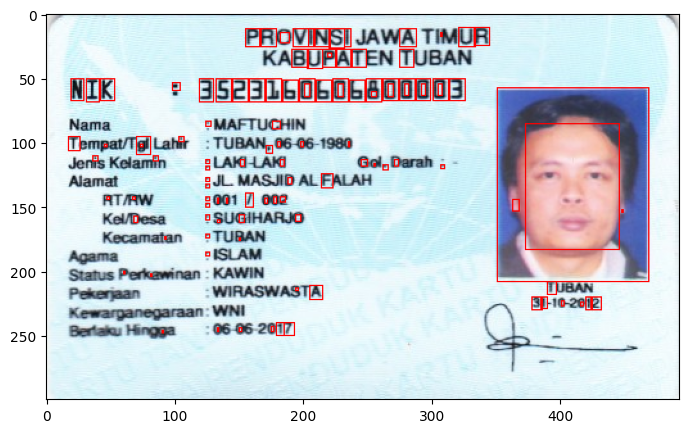

In [ ]:
# Load the input image
ktp = cv.imread('/content/drive/MyDrive/PCVK/KTP_More/KTP_More/ktp4.png')

blurred = cv.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

plt.figure(figsize=(10,5))
plt.imshow(cv.cvtColor(ktp, cv.COLOR_BGR2RGB))

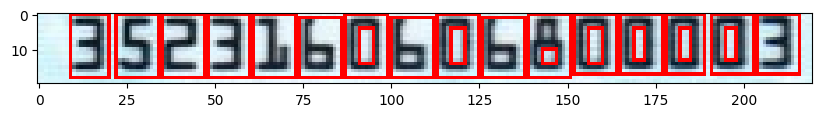

In [ ]:
# Load the input image
ktp = cv.imread('/content/drive/MyDrive/PCVK/KTP_More/KTP_More/ktp4.png')

blurred = cv.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

cropped_img = ktp[50:70, 110:330]

plt.figure(figsize=(10,5))
plt.imshow(cv.cvtColor(cropped_img, cv.COLOR_BGR2RGB))

In [ ]:
import os
import cv2 as cv
import numpy as np
import pickle
import tensorflow as tf
from keras.utils import to_categorical
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, ZeroPadding2D
from keras.models import Model
from keras.optimizers import Adam

# Load dataset MNIST
(X_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

# Jumlah data yang ingin diambil dari setiap kategori
num_samples_per_class = 100

# List digit yang akan diambil (0 sampai 9)
digits_to_extract = list(range(10))

# Fungsi untuk mengambil sampel dari setiap kategori
def extract_samples(X, y, digits, num_samples):
    samples = []
    for digit in digits:
        digit_indices = np.where(y == digit)[0]
        selected_indices = np.random.choice(digit_indices, num_samples, replace=False)
        samples.extend([(X[i], digit) for i in selected_indices])
    return samples

# Ambil sampel dari setiap kategori
training_data = extract_samples(X_train, y_train, digits_to_extract, num_samples_per_class)

# Acak urutan data
np.random.shuffle(training_data)

# Pisahkan fitur dan label
X, Y = zip(*training_data)

# Konversi menjadi numpy array
X = np.array(X).reshape(-1, 28, 28, 1)

# Tulis ke file pickle
pickle_out = open("X_mnist.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y_mnist.pickle", "wb")
pickle.dump(to_categorical(Y, num_classes=10), pickle_out)
pickle_out.close()

In [ ]:
# Load file pickle
pickle_in = open("X_mnist.pickle", "rb")
X = pickle.load(pickle_in)
pickle_in = open("Y_mnist.pickle", "rb")
Y = pickle.load(pickle_in)

width, height = 28, 28  # Sesuaikan dengan ukuran gambar MNIST

# Input layer
inputs = Input(shape=(width, height, 1))
conv_layer = ZeroPadding2D(padding=(2, 2))(inputs)
conv_layer = Conv2D(16, (5, 5), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(64, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
flaten = Flatten()(conv_layer)
fc_layer = Dense(256, activation='relu')(flaten)
fc_layer = Dense(64, activation='relu')(fc_layer)

# Output layer
outputs = Dense(10, activation='softmax')(fc_layer)

adam = Adam(learning_rate=0.0001)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X, Y, epochs=20, verbose=1)
model.save('anpr.keras')

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.1625 - loss: 12.8126
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.4578 - loss: 1.7889
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.6690 - loss: 1.0597
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7680 - loss: 0.7255
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8498 - loss: 0.5232
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8684 - loss: 0.4310
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8867 - loss: 0.3832
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9182 - loss: 0.3018
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9389 - loss: 0.1916
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9636 - loss: 0.1662
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9751 - loss: 0.1285
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9543 - loss: 2.2595
Accuracy on the test set: 96.50%


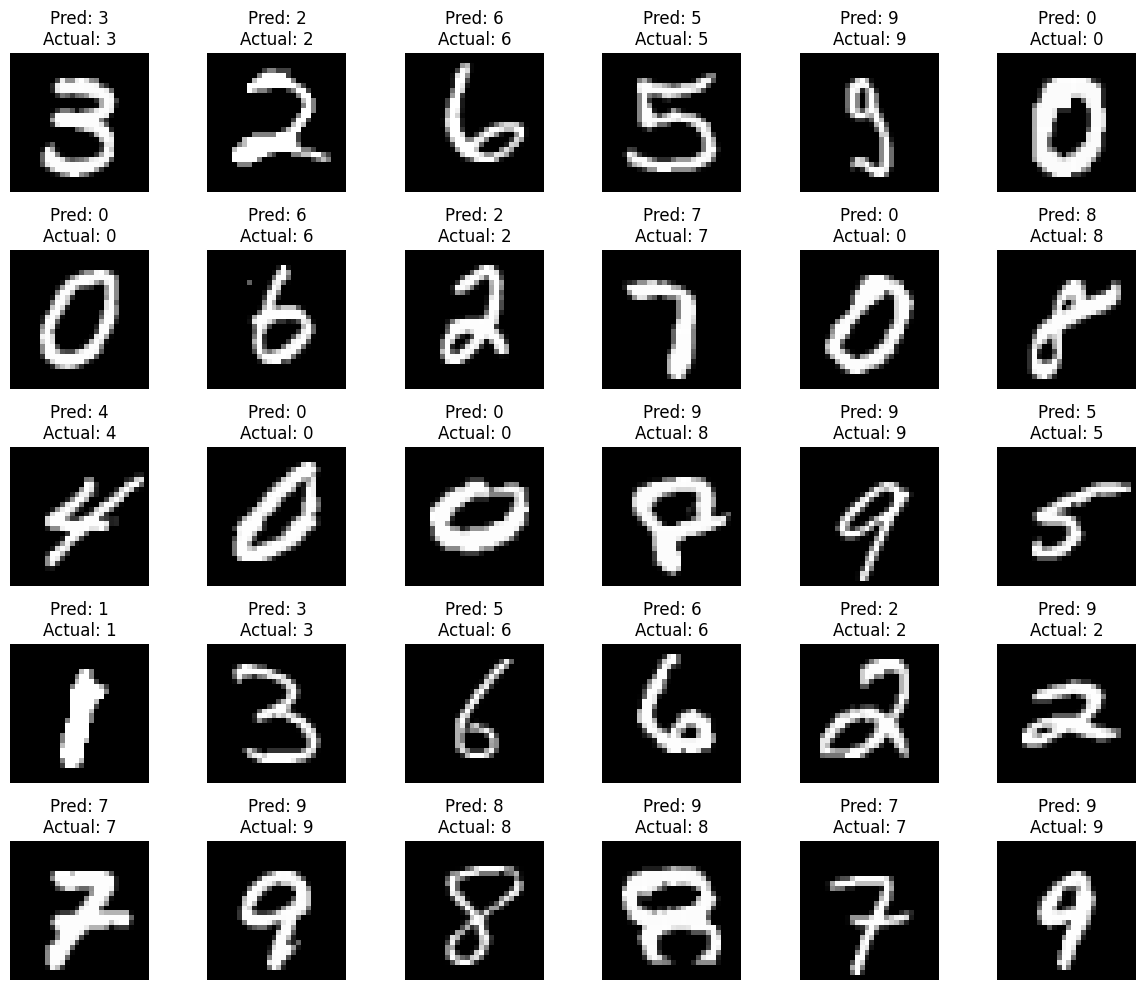

In [ ]:
# Load dataset MNIST yang sudah disiapkan sebelumnya
pickle_in = open("X_mnist.pickle", "rb")
X_test = pickle.load(pickle_in)
pickle_in = open("Y_mnist.pickle", "rb")
Y_test = pickle.load(pickle_in)

# Normalisasi data testing
X_test = X_test / 255.0

# Load model yang sudah di-training sebelumnya
model = tf.keras.models.load_model("anpr.keras")

# Lakukan prediksi pada data testing
predictions = model.predict(X_test)

# Evaluasi performa model
accuracy = model.evaluate(X_test, Y_test)[1]
print("Accuracy on the test set: {:.2f}%".format(accuracy * 100))

import matplotlib.pyplot as plt

# Tampilkan 30 hasil uji dengan gambarnya
num_results_to_display = 30
fig, axes = plt.subplots(5, 6, figsize=(12, 10))

for i in range(num_results_to_display):
    predicted_label = np.argmax(predictions[i])
    actual_label = np.argmax(Y_test[i])

    # Ambil gambar dari data testing
    img = X_test[i].reshape((28, 28))  # Assuming the images are 100x100 pixels

    # Tampilkan gambar dan label
    axes[i // 6, i % 6].imshow(img, cmap='gray')
    axes[i // 6, i % 6].set_title(f'Pred: {predicted_label}\nActual: {actual_label}')
    axes[i // 6, i % 6].axis('off')

plt.tight_layout()
plt.show()

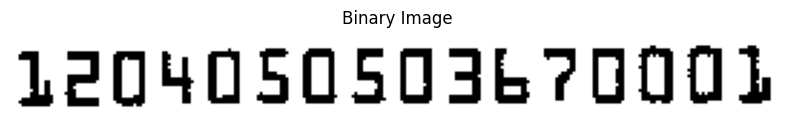

In [ ]:
# Load the input image
ktp = cv.imread('/content/drive/MyDrive/PCVK/KTP_More/KTP_More/ktp5.png')

blurred = cv.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

cropped_img = ktp[60:90, 140:410]

# Convert to grayscale
cropped_gray = cv.cvtColor(cropped_img, cv.COLOR_BGR2GRAY)

# Apply binary thresholding
_, cropped_binary = cv.threshold(cropped_gray, 128, 255, cv.THRESH_BINARY)

plt.figure(figsize=(10, 5))
plt.imshow(cropped_binary, cmap='gray')
plt.title('Binary Image')
plt.axis('off')
plt.show()

Detected : 16


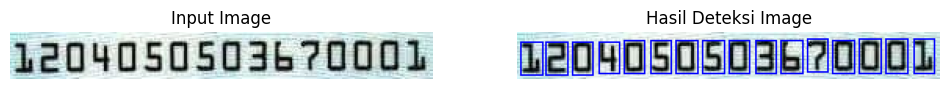

In [ ]:
gray = cv.cvtColor(cropped_img, cv.COLOR_RGB2GRAY)
thresh = cv.threshold(gray, 0, 255,
	cv.THRESH_BINARY | cv.THRESH_OTSU)[1]
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (1, 5))
thresh = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel)

contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
detected = cropped_img.copy()
nums=[]

for contour in contours:
    x, y, w, h = cv.boundingRect(contour)
    if w >= 10 and w <= 20 :
      cv.rectangle(detected, (x, y), (x + w, y + h), (255, 0, 0), 1)
      num = cropped_img[y:y+h,x:x+w].copy()
      nums.append(num)

print(f'Detected : {len(nums)}')
plt.figure(figsize=(12, 8))
plt.subplot(121), plt.imshow(cv.cvtColor(cropped_img,cv.COLOR_BGR2RGB), cmap='gray'), plt.title('Input Image'), plt.axis('off')
plt.subplot(122), plt.imshow(cv.cvtColor(detected,cv.COLOR_BGR2RGB), cmap='gray'), plt.title('Hasil Deteksi Image'), plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


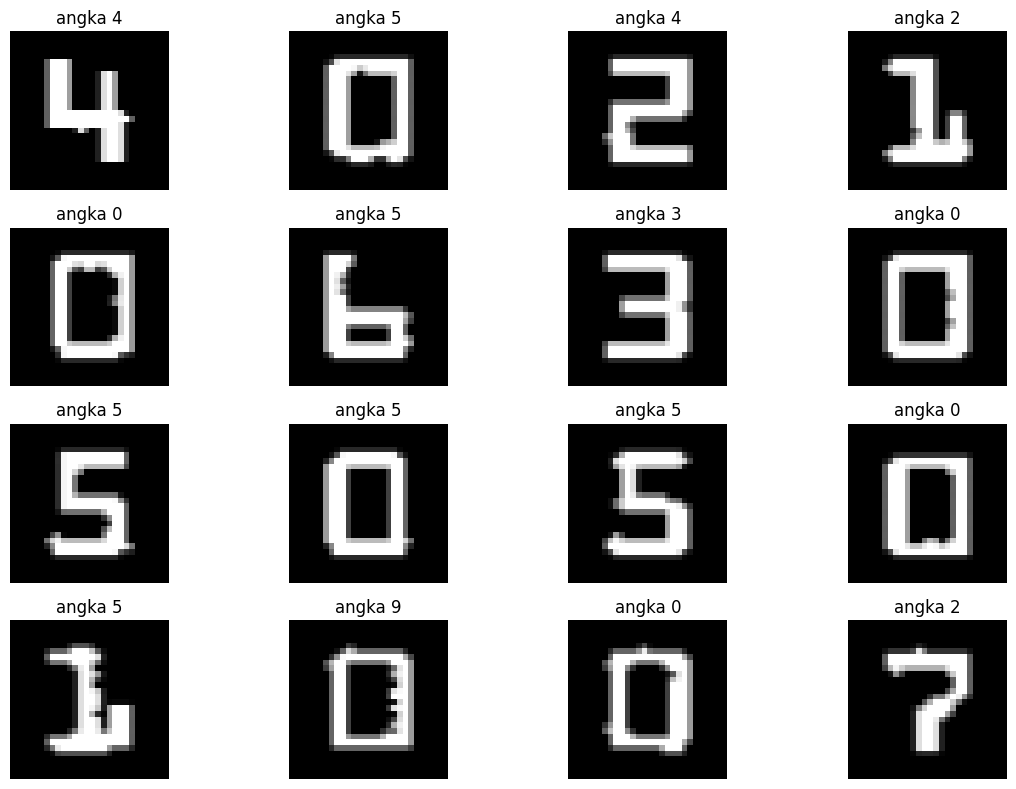

In [ ]:
from sklearn.decomposition import PCA

fig, axes = plt.subplots(4, 4, figsize=(12,8))

for i,num in enumerate(nums):
    num = cv.cvtColor(num,cv.COLOR_BGR2GRAY)
    ret, thresh = cv.threshold(num, 127, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
    top, bottom, left, right = 4, 4, 4, 4
    num = cv.copyMakeBorder(thresh, top, bottom, left, right, cv.BORDER_CONSTANT, value=(0, 0, 0))
    num = cv.resize(num, (28, 28))
    num = np.array(num)
    num = num / 255.0
    #PCA
    num_vector = num.reshape((-1, 1))
    pca = PCA(n_components= 1)
    num_pca = pca.fit_transform(num_vector)
    num_upscaled = num_pca.reshape(-1, 28, 28, 1)
    pred = model.predict(num_upscaled)
    pred = np.argmax(pred)

    axes[i // 4, i % 4].imshow(num_upscaled.reshape(num.shape), cmap='gray')
    axes[i // 4, i % 4].set_title(f'angka {pred}')
    axes[i // 4, i % 4].axis('off')

plt.tight_layout()
plt.show()